In [312]:
from datetime import timedelta, datetime, time, date
import requests
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd

In [313]:
datetime.strftime(date.today(), '%Y-%m-%d')
# datetime.strftime(date.today() - timedelta(days=10), '%Y-%m-%d')


'2023-10-20'

In [314]:
addr = '0xc9becdbc62efb867cb52222b34c187fb170379c6'

end = datetime.strftime(date.today() + timedelta(days=1), '%Y-%m-%d')
start = datetime.strftime(date.today() - timedelta(days=7), '%Y-%m-%d')
timeFrame = 'hour'

# u1 = 'https://api-v2.pendle.finance/core/v2/1/markets/0xc9becdbc62efb867cb52222b34c187fb170379c6/history?time_frame=hour&timestamp_start=2023-10-19&timestamp_end=2023-10-20'
u = 'https://api-v2.pendle.finance/core/v2/1/markets/' + addr + '/history?time_frame=' + timeFrame + '&timestamp_start=' + start + '&timestamp_end=' + end

r = requests.get(u)
res = r.json()['results'] # timestamp,  'underlyingInterestApy', 'underlyingRewardApy', 'underlyingApy',
                        # 'impliedApy','ytFloatingApy' ,'ptDiscount'

ts_lst = []
underlyingInterestAPY_lst = []
underlyingRewardAPY_lst = []
underlyingAPY_lst = []
impliedAPY_lst = []
longYieldAPY = []
ptPrice = []
ytPrice = []

for i in range(0, len(res)):
    ts_lst.append(res[i]['timestamp'])
    underlyingInterestAPY_lst.append(res[i]['underlyingInterestApy'])
    underlyingRewardAPY_lst.append(res[i]['underlyingRewardApy'])
    underlyingAPY_lst.append(res[i]['underlyingApy'])
    impliedAPY_lst.append(res[i]['impliedApy'])
    longYieldAPY.append(res[i]['ytFloatingApy'])
    ytPrice.append(res[i]['ptDiscount'])
    ptPrice.append(1.0 - res[i]['ptDiscount'])

In [315]:
with open('pendleData.pkl', 'rb') as fp:
    tmpDict = pickle.load(fp)

util_ts = []
crvUtil = []

for j in tmpDict.keys():
    util_ts.append(datetime.fromtimestamp(tmpDict[j][7]).isoformat())
    crvUtil.append(tmpDict[j][5])

In [318]:
l = len(util_ts)
print(l)
num_labels = 9
div = math.ceil(l / num_labels)

util_ts_labels = []
util_ts_labels.append(util_ts[0])
for k in range(div, l - div, div):
    # ts_len = len(util_ts[k])
    util_ts_labels.append(util_ts[k])

util_ts_labels.append(util_ts[l - 1])

#
# def avg_lst(lst):
#     return sum(lst) / len(lst)
#
# avg_crv_util = avg_lst(crvUtil)
#
# def median_lst(lst):
#     test_lst = lst.copy()
#     test_lst.sort()
#     mid = len(test_lst) // 2
#     res = (test_lst[mid] + test_lst[~mid]) / 2
#
#     return res
#
# median_crv_util = median_lst(crvUtil)
# print(median_crv_util)
#


191


In [319]:

# def time_diff(lst):
#     strt = datetime.fromisoformat(lst[0])
#     end = datetime.fromisoformat(lst[len(lst) - 1])
#     return (end - strt).total_seconds()
#
#
#
# util_ts_1 = []
# for ts in util_ts:
#     util_ts_1.append(str(ts))
#
# diff = time_diff(util_ts_1)
#
# secs_in_day = 86400
# days = diff / secs_in_day
# buckets = math.ceil(days)
#
# bucket_diff = diff / 2
#
# util_secs = []
# for x in util_ts:
#     conv = datetime.fromisoformat(str(x)) - datetime(1900,1,1)
#     s = conv.total_seconds()
#     util_secs.append(s)
#
# tsdf = pd.DataFrame({
#     'ts': util_secs,
#     'util': crvUtil
# })
#
#
# print(util_secs[0] + bucket_diff)
#
# tsdf_1 = tsdf.loc[tsdf['ts'] <= (util_secs[0] + bucket_diff)]
#
# tsdf_2 = tsdf.loc[tsdf['ts'] >= (util_secs[0] + bucket_diff)]
#
#
# avg_df_1 = avg_lst(tsdf_1['util'])
# avg_df_2 = avg_lst(tsdf_2['util'])
#
# print(avg_df_1)
# print(avg_df_2)
#


In [309]:
tsdf['ts']

0      3.906634e+09
1      3.906634e+09
2      3.906640e+09
3      3.906641e+09
4      3.906642e+09
           ...     
186    3.906811e+09
187    3.906812e+09
188    3.906812e+09
189    3.906813e+09
190    3.906814e+09
Name: ts, Length: 191, dtype: float64

In [320]:
# util_ts
util_ts_labels

util_ts_labels_sh = []
for val in util_ts_labels:
    util_ts_labels_sh.append(val[0:10] + '\n' + val[11:16])

# util_ts_labels_sh
# util_ts

Text(0, 0.5, 'CRV Utilization Rate')

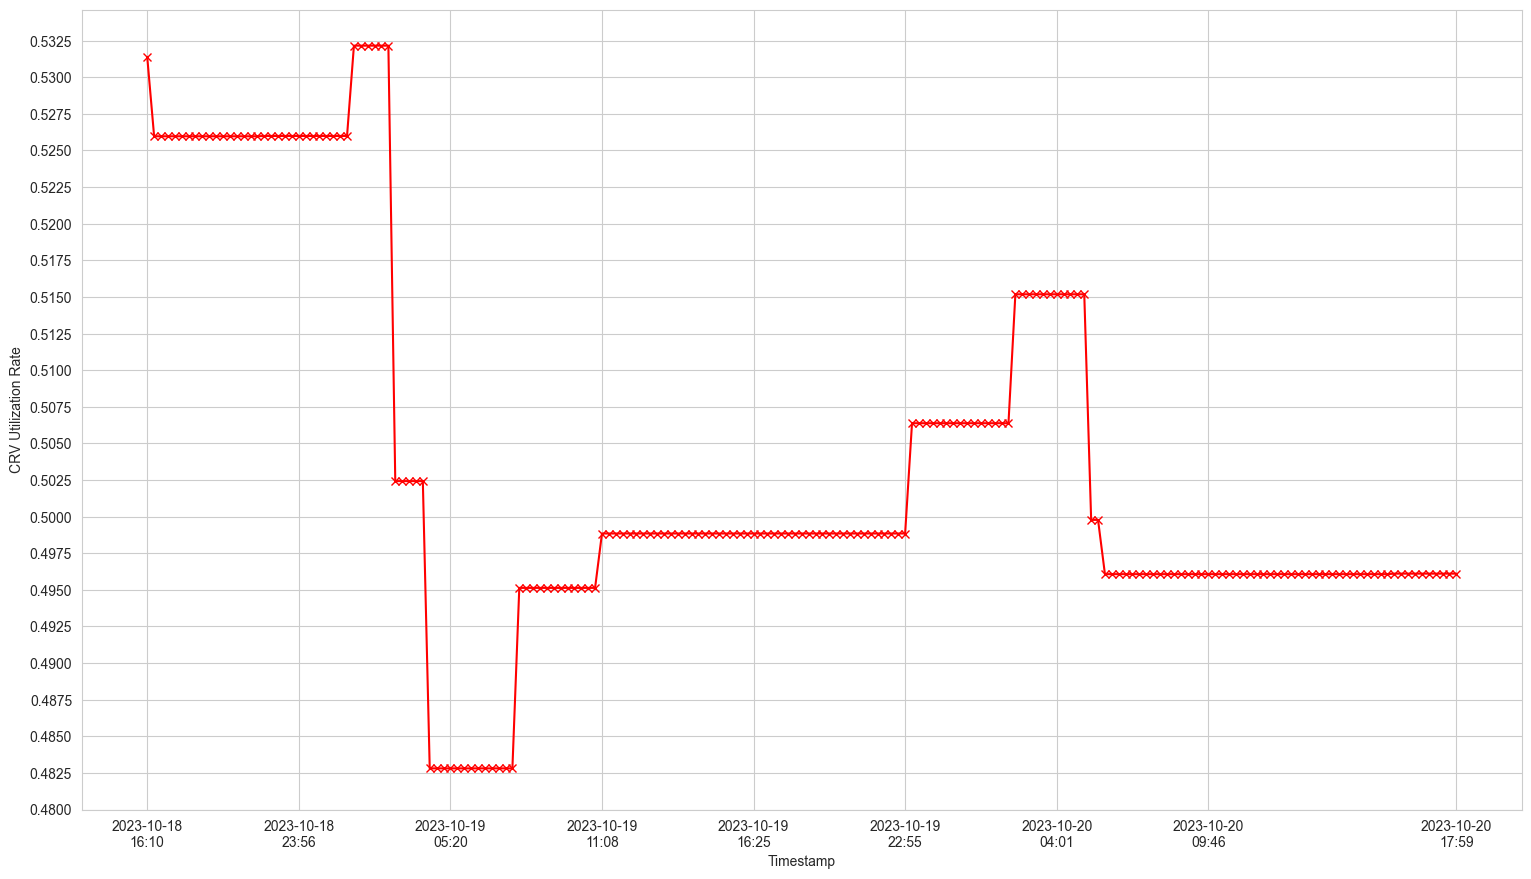

In [321]:
sns.set_style('whitegrid')


fig = plt.figure(figsize=(18,10))


uopt = 0.50



ax = fig.add_axes([0.1,0.1,0.8,0.8])


# fig = plt.figure())
# ax = fig.add_axes

# plt.figure(figsize=(18,6))
ax.plot(util_ts, crvUtil, marker='x', color='red')

ax.set_xticks(util_ts_labels)

ax.set_xticklabels(util_ts_labels_sh)

s, e = ax.get_ylim()
ax.set_yticks(np.arange(round(s, 2),e ,0.0025))

# plt.axhline(y = uopt, color = 'green', linestyle = '-')
# plt.axhline(y = avg_df_1, color = 'yellow', linestyle = '-')
# plt.axhline(y = avg_df_2, color = 'orange', linestyle = '-')



plt.xlabel('Timestamp')
plt.ylabel('CRV Utilization Rate')

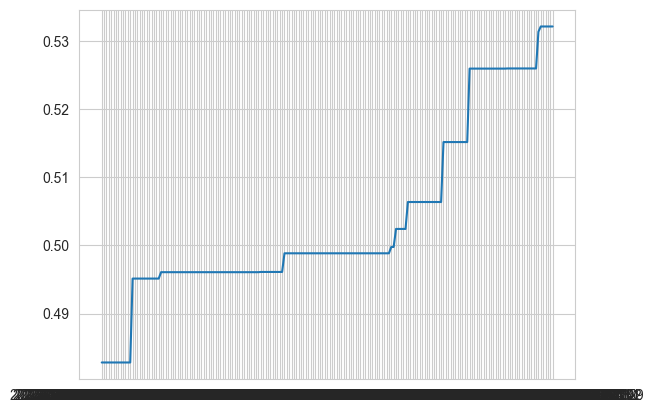

In [306]:
plt.plot(util_ts, crvUtil)